**1. Define Problem: Detect fake news based on title and content**

FEATURES 
- Title: Title of the news
- Text: Brief content of the news
- Labels: FAKE or REAL

**2. Import Library**

In [ ]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project

/content/drive/MyDrive/Project


**3**.**Load Data Set**

In [ ]:
data = pd.read_csv("news.csv")
data = data.drop(['Unnamed: 0'], axis=1)
labels = data.label
print("data shape: {}".format(data.shape))
print(data.isna().sum())
data.head(6)

data shape: (6335, 3)
title    0
text     0
label    0
dtype: int64


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE


In [ ]:
labels=data.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

**4. Divide Dataset**

In [ ]:
tf = TfidfVectorizer()

In [ ]:
title = data.iloc[:,0].values
text = data.iloc[:,1].values
news_title = tf.fit_transform(title).todense()
news_text = tf.fit_transform(text).todense()
news = np.hstack((news_title,news_text))

In [ ]:
news.shape

(6335, 77730)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.2, random_state=7)

**5. Using TfidfVectorizer to deal with data**

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 92.58%
Recall:  0.925808997632202
F1:  0.9258093673652462
              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

Confusion matrix, without normalization


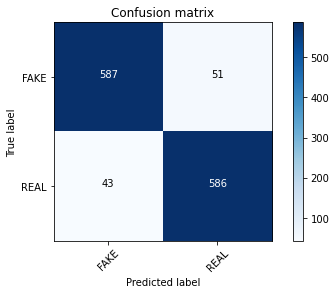

In [ ]:
pac.fit(tfidf_train, y_train)
pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')
print('Recall: ', recall_score(y_test,pred,average= 'weighted'))
print("F1: ", f1_score(y_test,pred, average= 'weighted'))
print(classification_report(y_test, pred, target_names = ["FAKE","REAL"]))
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Accuracy: 81.61%
Recall:  0.8161010260457774
F1:  0.8161019425476959
              precision    recall  f1-score   support

        FAKE       0.82      0.82      0.82       638
        REAL       0.81      0.82      0.81       629

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267

Confusion matrix, without normalization


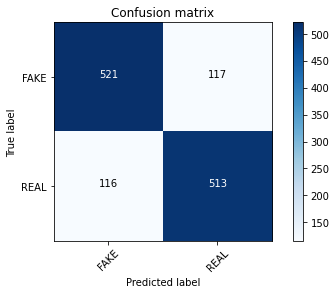

In [ ]:
dtc = DecisionTreeClassifier()
x_train = np.asarray(tfidf_train)
y_train = np.asarray(y_train)
dtc.fit(tfidf_train,y_train)
y_pred = dtc.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
print('Recall: ', recall_score(y_test,y_pred,average= 'weighted'))
print("F1: ", f1_score(y_test,y_pred, average= 'weighted'))
print(classification_report(y_test, y_pred, target_names = ["FAKE","REAL"]))
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Accuracy: 90.61% 
Recall:  0.9060773480662984
F1:  0.9060767629473375
              precision    recall  f1-score   support

        FAKE       0.91      0.91      0.91       638
        REAL       0.91      0.90      0.91       629

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

Confusion matrix, without normalization


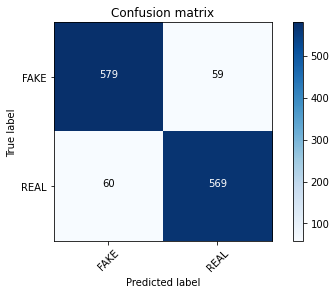

In [ ]:
rf = RandomForestClassifier()
rf.fit(tfidf_train,y_train)
y_prediction = rf.predict(tfidf_test)
print('Accuracy: {}% '.format(round(accuracy_score(y_test,y_prediction) * 100,2)))
print('Recall: ', recall_score(y_test,y_prediction,average= 'weighted'))
print("F1: ", f1_score(y_test,y_prediction, average= 'weighted'))
print(classification_report(y_test, y_prediction, target_names = ["FAKE","REAL"]))
cm = confusion_matrix(y_test, y_prediction, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])